# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [155]:
df = pd.read_csv('../data/states_edu.csv')
df.head(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,NaN,NaN,488476.0,227.0,274.0,222.0,NaN
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,NaN,NaN,104321.0,218.0,263.0,213.0,NaN
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,NaN,NaN,80937.0,193.0,235.0,188.0,NaN
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,NaN,NaN,1981407.0,214.0,260.0,208.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [156]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [157]:
# Ensure to keep a copy of the original data as a backup
df_edu = df.copy()

In [158]:
df_edu.rename({
    'GRADES_PK_G':'num_PREK', # Pre-Kindergarten
    'GRADES_KG_G':'num_KINDER', # Kindergarten
    'GRADES_4_G':'num_4', # 4th grade
    'GRADES_8_G':'num_8', # 8th grade
    'GRADES_12_G':'num_12', # 12th grade
    'GRADES_1_8_G':'num_PRIMARY', # first through eighth grades
    'GRADES_9_12_G':'num_HS', # 9 through 12 grades
    'GRADES_ALL_G':'num_ALL_NCES', # all students - NCES's estimate for students in the state
    'ENROLL':'num_ALL_census' # The U.S. Census Bureau's count for students in the state
    },
    axis=1,inplace=True)

In [159]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   num_ALL_census                1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  num

In [160]:
# Check percentage of missing value 
missing_percent = df_edu.isnull().sum() / len(df_edu) * 100
missing_percent

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
num_ALL_census                  28.629738
TOTAL_REVENUE                   25.655977
FEDERAL_REVENUE                 25.655977
STATE_REVENUE                   25.655977
LOCAL_REVENUE                   25.655977
TOTAL_EXPENDITURE               25.655977
INSTRUCTION_EXPENDITURE         25.655977
SUPPORT_SERVICES_EXPENDITURE    25.655977
OTHER_EXPENDITURE               28.629738
CAPITAL_OUTLAY_EXPENDITURE      25.655977
num_PREK                        10.087464
num_KINDER                       4.839650
num_4                            4.839650
num_8                            4.839650
num_12                           4.839650
num_PRIMARY                     40.524781
num_HS                          37.551020
num_ALL_NCES                     4.839650
AVG_MATH_4_SCORE                67.055394
AVG_MATH_8_SCORE                64.897959
AVG_READING_4_SCORE             62

In [161]:
print("Original Data:", len(df_edu) , ", After drop all rows with null values:", len(df_edu.dropna()))

Original Data: 1715 , After drop all rows with null values: 355


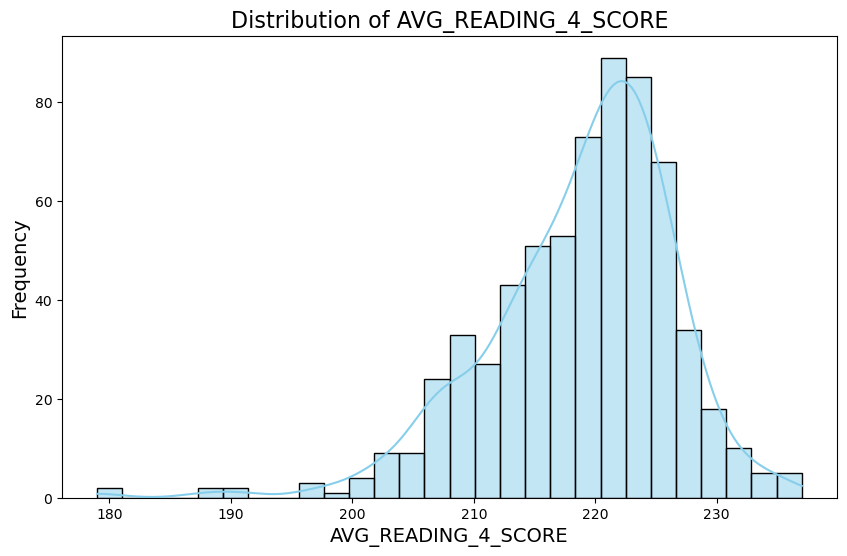

In [162]:
# Set AVG_READING_4_SCORE as response variable, and use regression model later
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df_edu['AVG_READING_4_SCORE'], kde=True, color='skyblue')
plt.title('Distribution of AVG_READING_4_SCORE', fontsize=16)
plt.xlabel('AVG_READING_4_SCORE', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [163]:
# Set response variable as AVG_READING_4_SCORE
# Decide to drop the missing values in this variable for now, as there is currently insufficient important information to impute them effectively
df_edu.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)

In [164]:
# Since it is safer to handle missing values before running a regression model later,remove all missing values first using dropna
# If there's a chance, I need to modify the checkpoint1 file later, I will also try other methods like imputation
df_edu = df_edu.dropna()

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Reading

How many years of data are logged in our dataset? 

In [165]:
# @@@ 1
# For dataset after dropping some missing values of AVG_READING_4_SCORE
print("After drop:", df_edu['YEAR'].nunique())
# Original data
print("Original:", df['YEAR'].nunique())


After drop: 7
Original: 33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [166]:
# @@@ 2
states = df_edu[df_edu['STATE'].isin(['MICHIGAN', 'OHIO'])]
states_average = states.groupby('STATE')['AVG_READING_4_SCORE'].mean()
print(states_average)
# So OHIO has the higher average across all years

STATE
MICHIGAN    218.142857
OHIO        224.142857
Name: AVG_READING_4_SCORE, dtype: float64


Find the average for your chosen test across all states in 2019

In [167]:
# @@@ 3
df_edu_2019 = df_edu[df_edu['YEAR'] == 2019]
average_2019 = df_edu_2019['AVG_READING_4_SCORE'].mean()
print("Average for 'AVG_READING_4_SCORE' across all states in 2019:", average_2019)

Average for 'AVG_READING_4_SCORE' across all states in 2019: nan


For each state, find a maximum value for your chosen test score

In [168]:
# @@@ 4
max_avg_reading = df_edu.groupby('STATE')['AVG_READING_4_SCORE'].max()
print("Maximum value for 'AVG_READING_4_SCORE is:", max_avg_reading)

Maximum value for 'AVG_READING_4_SCORE is: STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 215.0
ARKANSAS                219.0
CALIFORNIA              213.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    212.0
FLORIDA                 227.0
GEORGIA                 222.0
HAWAII                  215.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   226.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             214.0
MISSOURI                224.0
MONTANA                 227.0
NEBRASKA                227.0
NEVADA                  214.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              231.0
NEW_MEXICO           

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [169]:
# @@@ 5
# Investment in education could influence student performance
df_edu['expenditure_per_student'] = df_edu['TOTAL_EXPENDITURE'] / df_edu['num_ALL_NCES']
# Proportion of the total expenditure allocated to education can impact scores
df_edu['instruction_exp_percentage'] = (df_edu['INSTRUCTION_EXPENDITURE'] / df_edu['TOTAL_EXPENDITURE']) * 100


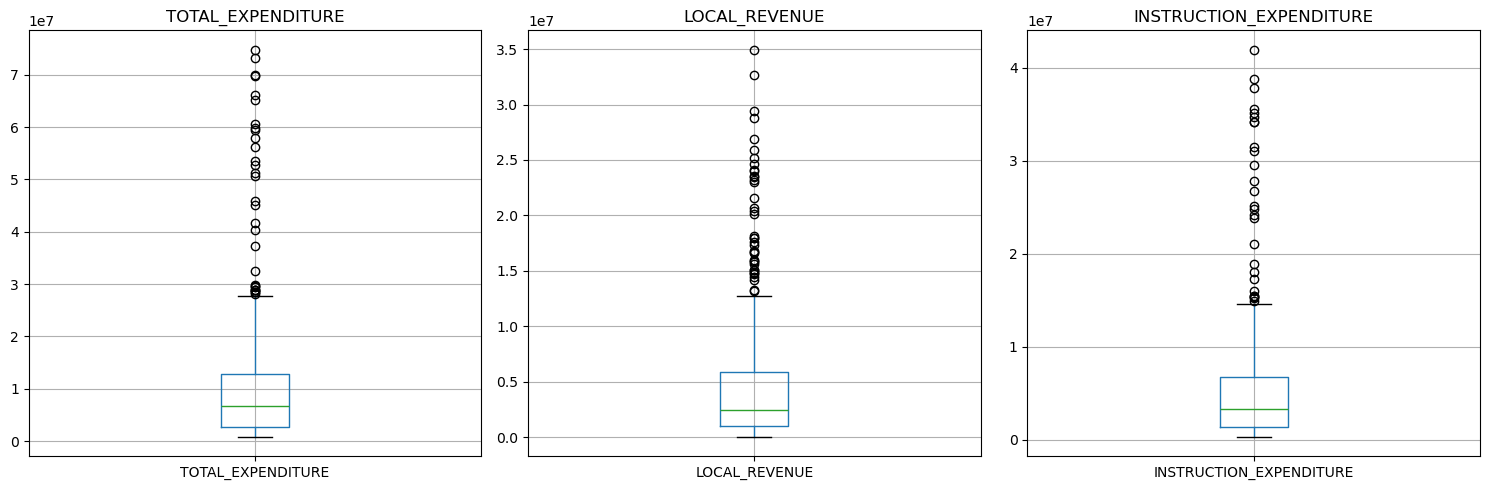

In [170]:
# Scaling continuous variables to improve model performance - later
# Before scaling, create some plots to explore outliers and determine whether MinMax Scaling or Standard Scaler would be more appropriate
# Create example plots

features = ['TOTAL_EXPENDITURE', 'LOCAL_REVENUE', 'INSTRUCTION_EXPENDITURE']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(features):
    df_edu[[feature]].boxplot(ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

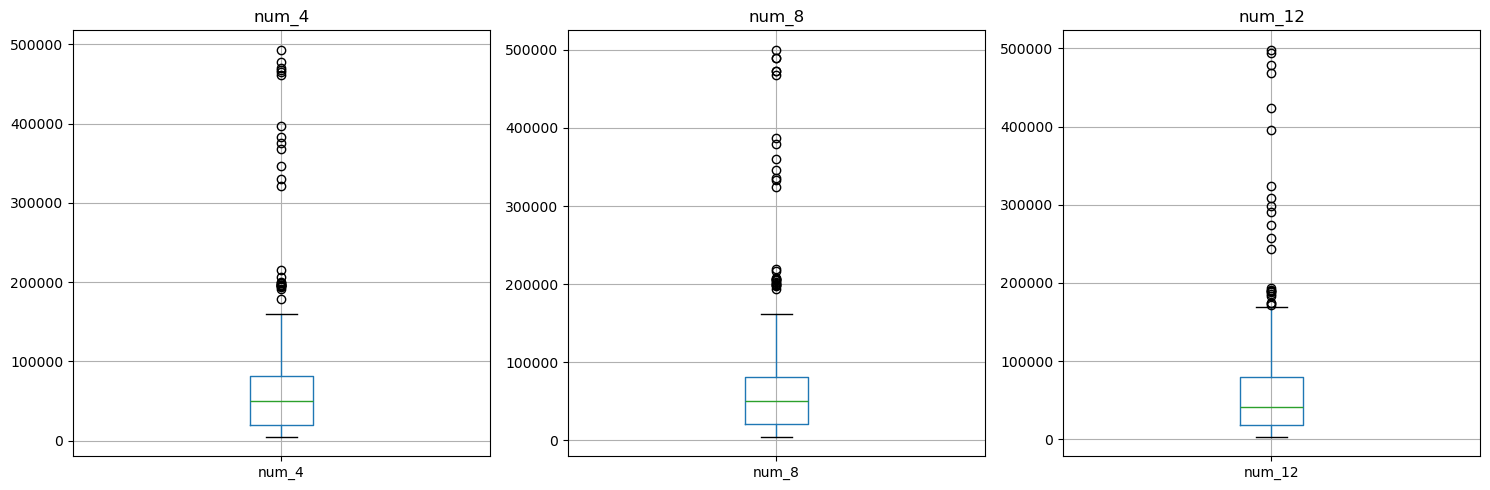

In [171]:
# Create example plots
features = ['num_4','num_8','num_12']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(features):
    df_edu[[feature]].boxplot(ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

# We can see that there are a lot of outliers, so it's better to use Standard Scalar for continuous variables later

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

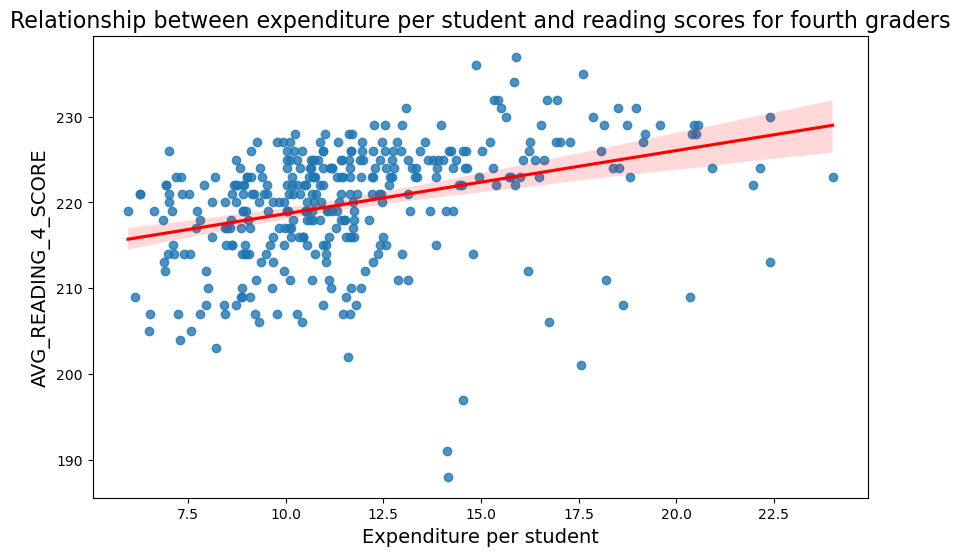

In [172]:
# @@@ 6
# Scatter plot with regression line
# Check relationship between response variable and 'expenditure per student'
plt.figure(figsize=(10, 6))
sns.regplot(
    x = 'expenditure_per_student', 
    y = 'AVG_READING_4_SCORE', 
    data = df_edu, 
    line_kws={'color': 'red'}
)
plt.title('Relationship between expenditure per student and reading scores for fourth graders', fontsize=16)
plt.xlabel('Expenditure per student', fontsize=14)
plt.ylabel('AVG_READING_4_SCORE', fontsize=14)
plt.show()

**<CAPTION FOR VIZ 1>**  
As student expenditure increases, 4th grade reading scores tend to increase slightly. But the scores are not entirely dependent on expenditure, so it's better to check other factors as well. Other factors can influce the reading scores.

**Visualization 2**

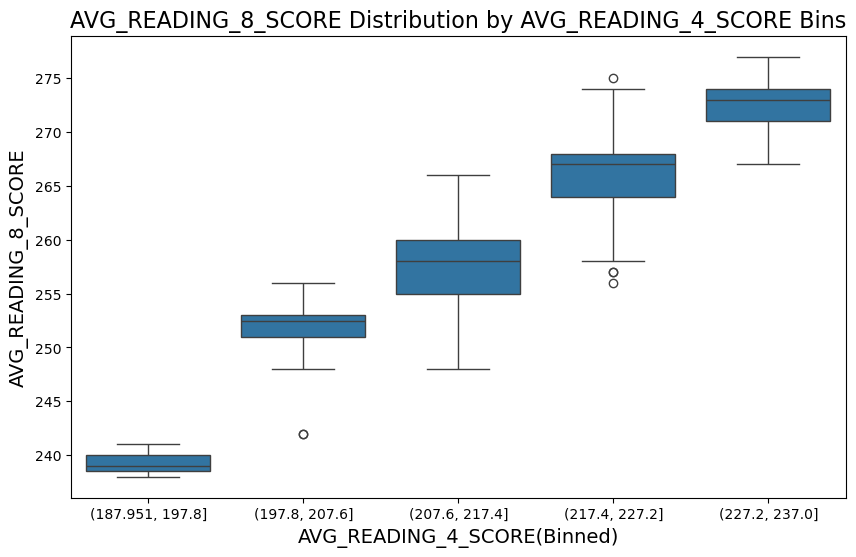

In [173]:
# @@@ 7
# Boxplot
# Check relationship between response variable and 'AVG_READING_8_SCORE'
df_edu['Reading_4_bin'] = pd.cut(df_edu['AVG_READING_4_SCORE'], bins = 5)

plt.figure(figsize=(10, 6))
sns.boxplot(
    x = 'Reading_4_bin', 
    y = 'AVG_READING_8_SCORE', 
    data = df_edu
)
plt.title('AVG_READING_8_SCORE Distribution by AVG_READING_4_SCORE Bins', fontsize=16)
plt.xlabel('AVG_READING_4_SCORE(Binned)', fontsize=14)
plt.ylabel('AVG_READING_8_SCORE', fontsize=14)
plt.show()

**<CAPTION FOR VIZ 2>**  
As the binned ranges of AVG_READING_4_SCORE increase, the median and overall range of AVG_READING_8_SCORE also increase. So we can say that there is a positive relationship between these two variables.

**Visualization 3**

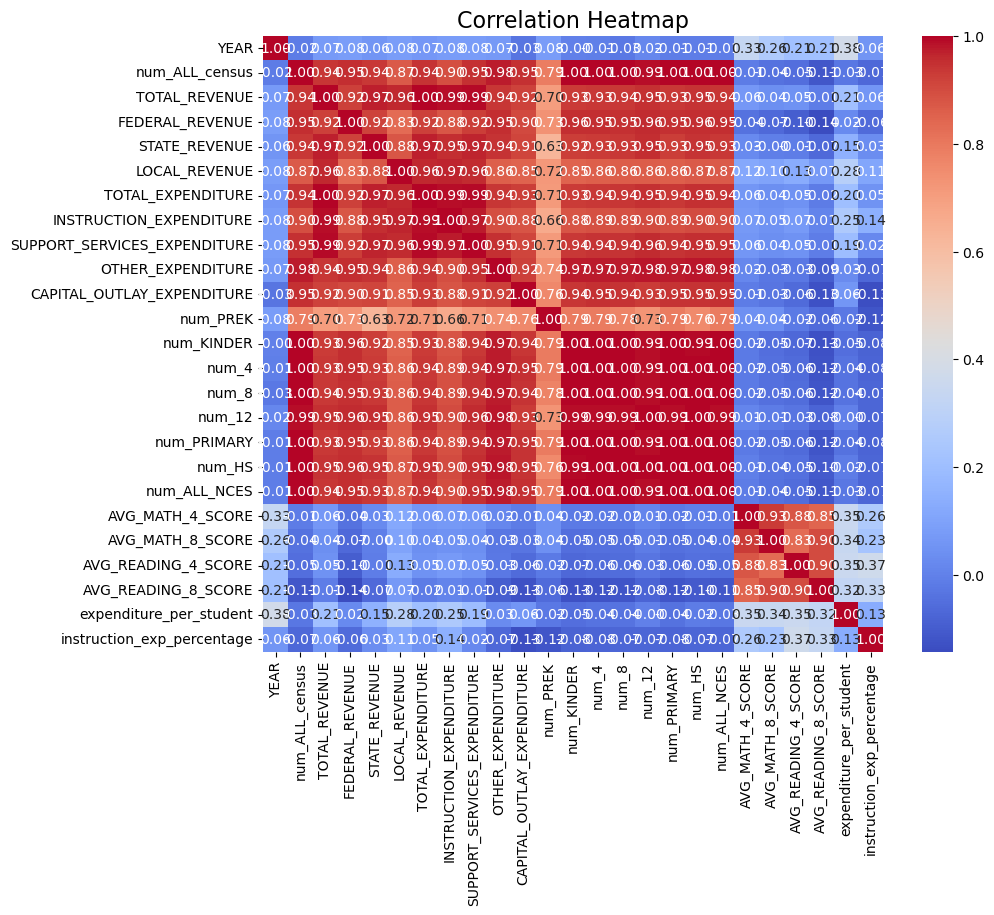

Correlation with AVG_READING_4_SCORE: AVG_READING_4_SCORE             1.000000
AVG_READING_8_SCORE             0.899264
AVG_MATH_4_SCORE                0.876969
AVG_MATH_8_SCORE                0.834632
instruction_exp_percentage      0.368487
expenditure_per_student         0.352747
YEAR                            0.208932
LOCAL_REVENUE                   0.133112
INSTRUCTION_EXPENDITURE         0.072567
TOTAL_REVENUE                   0.049732
SUPPORT_SERVICES_EXPENDITURE    0.048620
TOTAL_EXPENDITURE               0.045667
STATE_REVENUE                  -0.008202
num_PREK                       -0.017718
OTHER_EXPENDITURE              -0.025062
num_12                         -0.032071
num_HS                         -0.045057
num_ALL_census                 -0.051627
num_ALL_NCES                   -0.053758
num_8                          -0.057157
CAPITAL_OUTLAY_EXPENDITURE     -0.057302
num_PRIMARY                    -0.059116
num_4                          -0.060971
num_KINDER         

In [174]:
# Visualization 3
numeric_columns = df_edu.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = df_edu[numeric_columns].corr()

# Check correlation
target_corr = correlation_matrix['AVG_READING_4_SCORE'].sort_values(ascending=False)

# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Print the variables most strongly correlated with AVG_READING_4_SCORE
print("Correlation with AVG_READING_4_SCORE:", target_corr)


**<CAPTION FOR VIZ 3>**  
As correlation between AVG_READING_4_SCORE and AVG_READING_8_SCORE is 0.899264, 8th grade average reading scores are highly correlated with 4th grade reading scores. 8th grade average math scores also show a strong positive correlation, suggesting a relationship between math and reading skills.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
# @@@ 8

# Try selecting features with high correlation to the response variable(include those with a correlation of 0.3 or higher in X for now)
X = df_edu[['AVG_READING_8_SCORE', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'expenditure_per_student', 'instruction_exp_percentage']]
y = df_edu['AVG_READING_4_SCORE']

In [192]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, random_state=42)

In [193]:
# Add) Put this for increasing model performance
# Standard Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [194]:
# @@@ 10
# import your sklearn class here
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [195]:
# @@@ 11
# create your model here
model = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(estimator = model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best Gradient Boosting Model
best_model = grid_search.best_estimator_

In [196]:
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [197]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [198]:
# @@@ 12
# Use MSE, RMSE, and R^2(R-squared)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Just added
print("Gradient Boosting Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Gradient Boosting Results:
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error (MSE): 6.57
Root Mean Squared Error (RMSE): 2.56
R^2 Score: 0.81


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

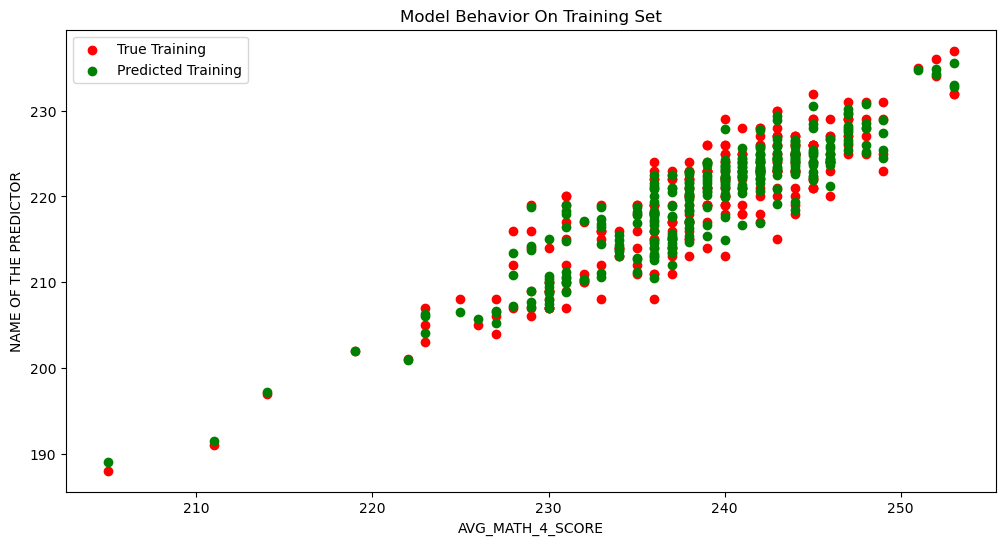

In [202]:
# @@@ 13

col_name = 'AVG_MATH_4_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

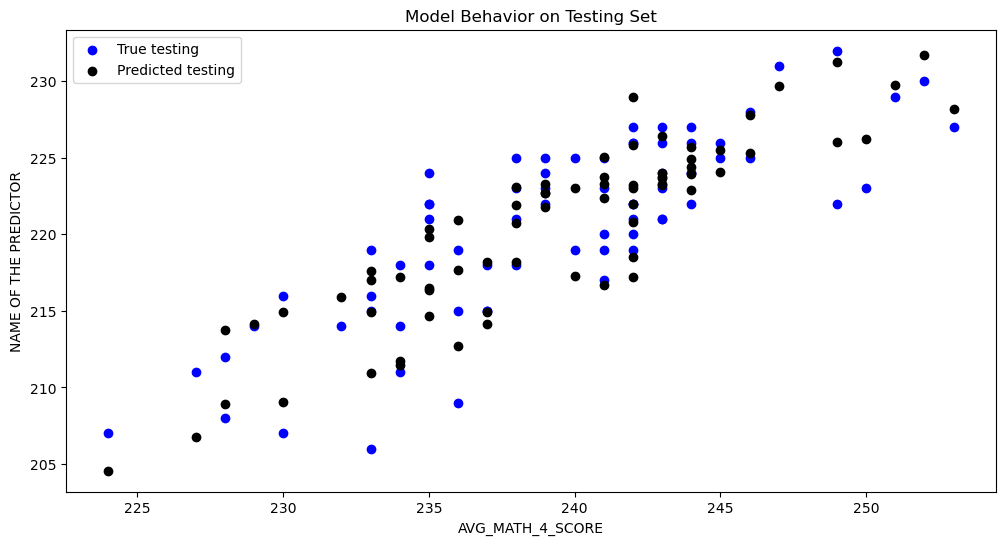

In [203]:
# @@@ 14


col_name = 'AVG_MATH_4_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")